In [1]:
from local_utils import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# 從生活中發現數學： 選擇的智慧




##  國立東華大學 應用數學系 魏澤人

2015 Nov 27 @師大附中  (MIT License)

# $\swarrow$ 打開$\|數學\|$之$\mathbf{\widetilde{眼}}$  $\nearrow$
#  ∿  $\small\oint$奧義$\small\oint$ $\otimes$ $\mathbf{次元}^{\tiny\infty}$_斬_∿

<center>𝕸𝕬𝕿𝕳 𝕮𝕬𝕹 𝕺𝕰𝕰 𝕯𝕴𝕸𝕰𝕹𝕺𝕴𝕺𝕹𝕺</center>

## 從生活中發現數學： 選擇的智慧

# 小女孩撿石頭的故事 
(轉寄信、民間傳說故事)

## 據說林肯總統，在郊外散步時，遇到了一個小女孩。他想考驗這個女孩

## 說：「小朋友，這段路上有很多石頭，妳從這裡走到那頭，撿一個最大的石頭來給我。石頭愈大，禮物就愈大。

# But
## 絕對不可以回頭撿哦！」

### 女孩便出發。
### 不多久，看到一粒很大的石頭，想撿，但又想：說不定前面還有更大的呢。
### 往前走了一陣，果然看到一粒更大的石頭。正想撿起，又想：「後面說不定還有更大的呢」。
### 就這樣猶豫不決，一不注意，便走到了盡頭，什麼也沒撿到。

## 很多人把它解釋在愛情上

## 小女孩走的這一段路不就好像是我們的人生嗎？

## 人生錯過了就再也不能回頭

* 用數學之眼，會看到裡面的數學
* 舒老師也看到了，等下會講
* 選擇的智慧，斬掉這一段

# 旋轉

In [2]:
!./rungeogebra

## 你的數學書在吶喊著：

## 換個角度來看世界吧！

## 真相藏在背後的次元

# 照片是怎麼壓縮成 JPEG 的?

## "JPEG is alien technology from the future".
###                  --   Tim Terriberry 

<video src="video/jpeg-split.webm" controls width=900 /> 

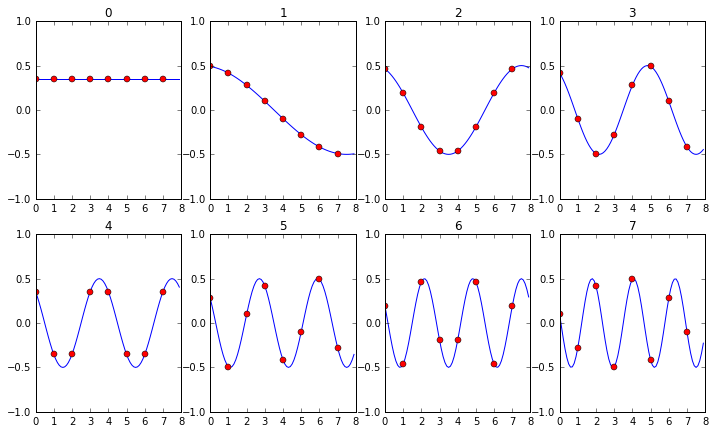

In [3]:
show_dct_fig()

<img src="img/Dctjpeg.png" width="600"/>

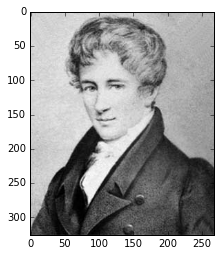

In [4]:
img = mpimg.imread('img/abel.jpg'); plt.imshow(img, cmap=mpl.cm.gray);

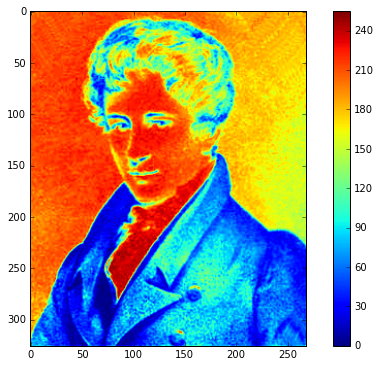

In [5]:
show_image(img)

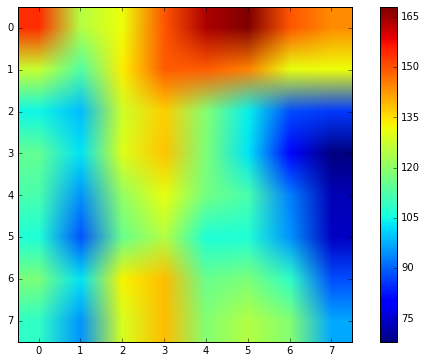

In [6]:
tiny = img[40:48, 64:72];show_image(tiny)

$$ G = {DCT} \cdot f \cdot {DCT}^{T} $$
$$ f = {DCT}^T \cdot G \cdot {DCT} $$

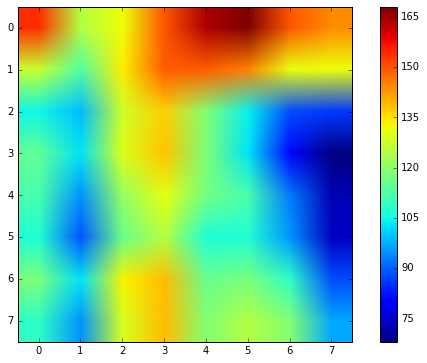

In [7]:
show_image(undoDCT(doDCT(tiny)))

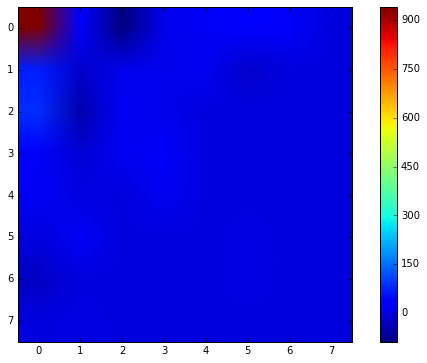

In [8]:
tinyDCT = doDCT(tiny);show_image(tinyDCT)

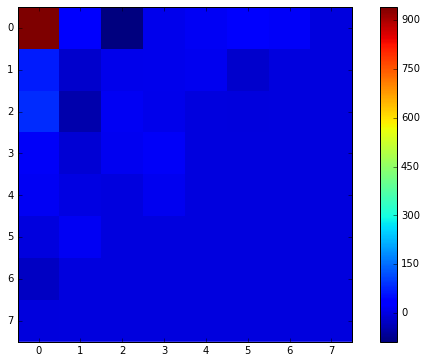

In [9]:
tinyDCT_chopped = chopped(tinyDCT, level=7);show_image(tinyDCT_chopped, "none")

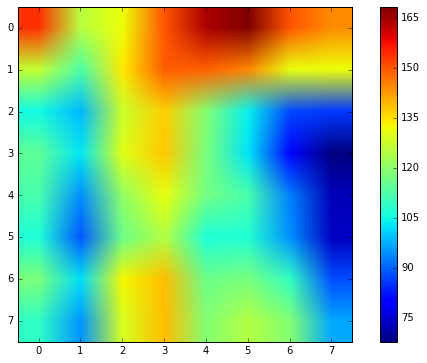

In [10]:
show_image(undoDCT(tinyDCT_chopped))

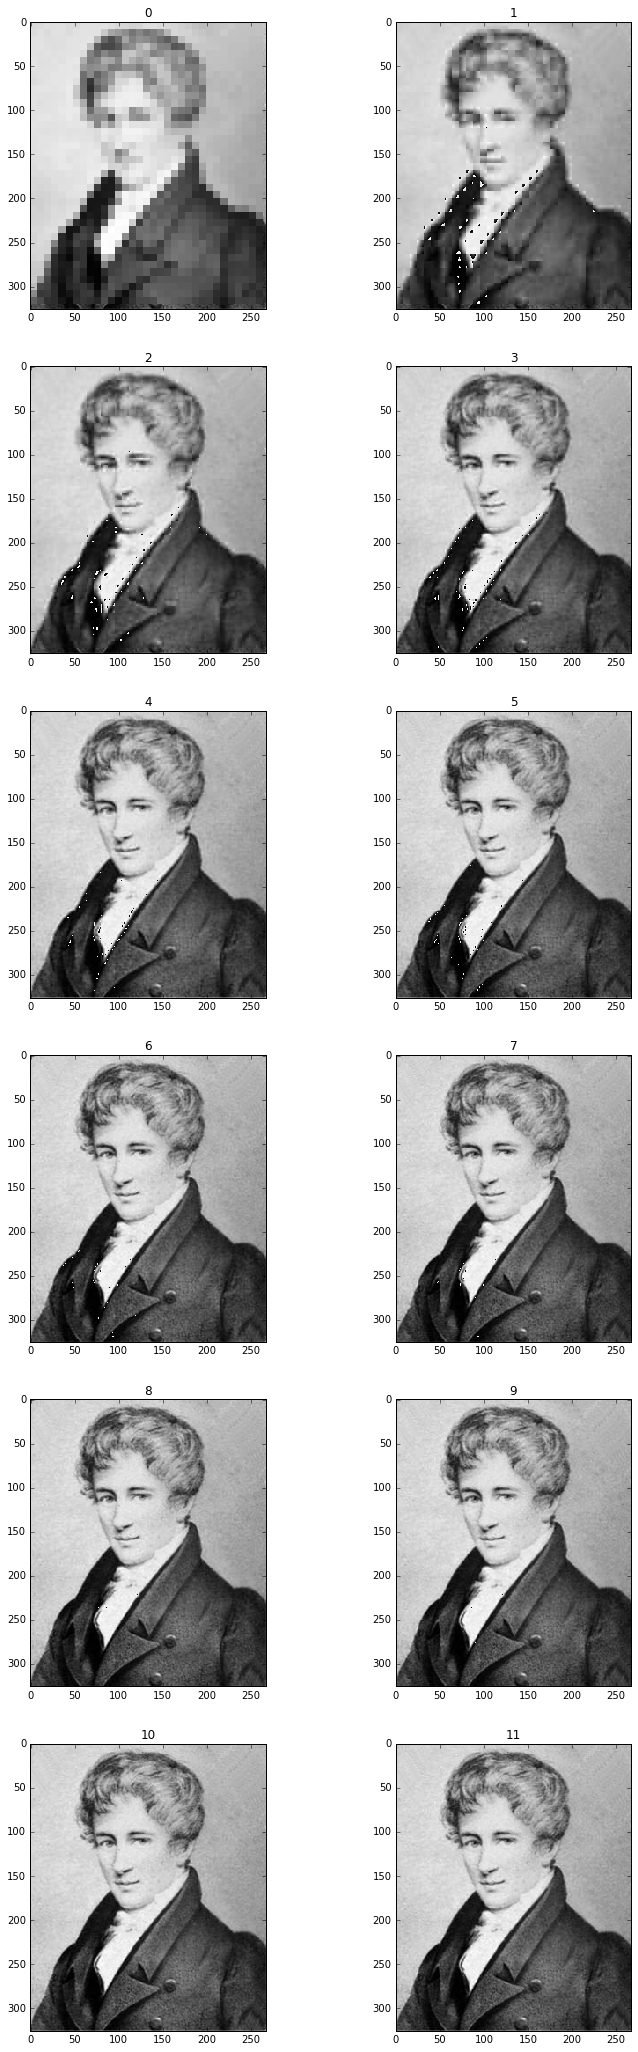

In [11]:
figure(figsize=(12,36))
for u in range(12):
    subplot(6, 2, u+1)
    title(str(u))
    imshow(dct_all(img, u), cmap=mpl.cm.gray, interpolation="none")

# Hybrid Image
A. Oliva, A. Torralba, P.G. Schyns (2006). Hybrid Images. ACM Transactions on Graphics, ACM Siggraph, 25-3, 527-530.

<img src="img/hybrid-me.png" />

<img src="img/e-highpass.png" />

<img src="img/m-lowpass.png" />

<img src="img/醫科.png" />

# Art Style Transfer
A Neural Algorithm of Artistic Style" by Gatys, Ecker and Bethge. (26 Aug 2015)

http://arxiv.org/abs/1508.06576, http://arxiv.org/abs/1505.07376, http://bethgelab.org/deepneuralart/.

<img src="img/ndhu.jpg" width=700 />

<img src="img/starry_night.jpg" width=700 />

<img src="img/ndhu-starry.png" width=700 />

<img src="img/skrik.jpg" />

<img src="img/ndhu-skrik.png" width=700 />

<img src="img/tjw-simpsons.png" />

# 乘法

<video src="video/mul.webm" controls width=800 /> 

# $53 \times 78$
## $ 5 \cdot 7  $
## $ 5 \cdot 8 + 3 \cdot 7  $
## $ 3 \cdot 8 $

# Karatsuba algorithm

# $53 \times 78$
## $ A = 5 \cdot 7  $
## $ B = 3 \cdot 8 $
## $ C = (5+3)\cdot(7+8)$
## $ 5 \cdot 8 + 3 \cdot 7 = C - A -B $ 

# $5321 \times 7894$
## $ A = 53 \cdot 78  $
## $ B = 21 \cdot 94 $
## $ C = (53+21)\cdot(78+94)$
## $ 53 \cdot 94 + 21 \cdot 78 = C - A - B $ 

# Toom–Cook

# $ 352 \times 516 $
## 只要 5 次乘法

# $ 352 \times 516 $
## $p(x) = 3x^2 + 5x + 2 $
## $q(x) = 5x^2 + 1x + 6 $
## 我們想求 $ p(10)q(10) $ 

## $ r(x) = p(x)q(x) $ 是 4 次多項式
## 代入5 個值就能決定係數

$\left(\begin{matrix}p(0)\\
p(1)\\
p(-1)\\
p(-2)\\
p(\infty)
\end{matrix}\right)=\left(\begin{matrix}0 & 0 & 1\\
1 & 1 & 1\\
1 & -1 & 1\\
4 & -2 & 1\\
1 & 0 & 0
\end{matrix}\right)\left(\begin{matrix}3\\
5\\
2
\end{matrix}\right)$

$\left(\begin{matrix}q(0)\\
q(1)\\
q(-1)\\
q(-2)\\
q(\infty)
\end{matrix}\right)=\left(\begin{matrix}0 & 0 & 1\\
1 & 1 & 1\\
1 & -1 & 1\\
4 & -2 & 1\\
1 & 0 & 0
\end{matrix}\right)\left(\begin{matrix}5\\
1\\
6
\end{matrix}\right)$


$\left(\begin{matrix}r(0)\\
r(1)\\
r(-1)\\
r(-2)\\
r(\infty)
\end{matrix}\right)=\left(\begin{matrix}p(0)q(0)\\
p(1)q(1)\\
p(-1)q(-1)\\
p(-2)q(-2)\\
p(\infty)q(\infty)
\end{matrix}\right).$

$\left(\begin{matrix}r(0)\\
r(1)\\
r(-1)\\
r(-2)\\
r(\infty)
\end{matrix}\right)=\left(\begin{matrix}0 & 0 & 0 & 0 & 1\\
1 & 1 & 1 & 1 & 1\\
1 & -1 & 1 & -1 & 1\\
16 & -8 & 4 & -1 & 1\\
1 & 0 & 0 & 0 & 0
\end{matrix}\right)\left(\begin{matrix}?\\
?\\
?\\
?\\
?
\end{matrix}\right).$

* 原來是交叉相乘(covolution)
* 經由座標變換
* 變成逐點相乘
* 再轉換回來即可

# Schönhage–Strassen 

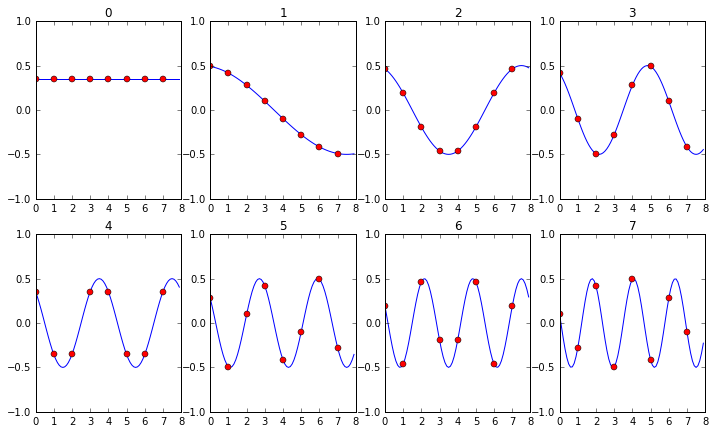

In [12]:
show_dct_fig()

# 更多更多

# word2vec

### King - Man + Woman = Queen

In [13]:
w('掌法')

('碧波', 0.8786735696108291)
('六七招', 0.8602076020115597)
('這路', 0.8328916738324939)
('拳法', 0.8291271932190515)
('降龍十八掌', 0.8038379575378314)
('外家', 0.7971126129482238)

In [14]:
w('蛤蟆功')-w('歐陽鋒')+ w('洪七公')

('降龍十八掌', 0.26691697876367115)
('拳法', 0.2608070228799759)
('靈蛇', 0.25582180430784784)
('掌法', 0.2548873923161527)
('家傳', 0.2535258085466294)
('所授', 0.250061078437255)

In [15]:
w("華箏")-w("郭靖") + w("周師兄")

('劉貴妃', 0.32884437986708626)
('皇爺', 0.3223600856772646)
('娶', 0.32044793109124564)
('我見', 0.3061185546085906)
('過世', 0.303332889431394)
('去世', 0.29416041969002693)

In [16]:
w('丘處機') + (w('鐵杖')-w("柯鎮惡"))

('長劍', 0.3016226574224647)
('焦木', 0.2995734699696353)
('金龍', 0.296509977226307)
('鞭', 0.28455708122842804)
('袍袖', 0.2840341409468587)
('毒龍', 0.27535583926544316)

In [17]:
w("鐵掌") + (w('周伯通')-w("空明拳"))

('裘千仞', 0.3249880468971764)
('鬧', 0.301599134320795)
('幫', 0.2603470882148582)
('裘幫主', 0.25407513503895546)
('瞧見', 0.24491260928373348)
('山腰', 0.24078460883957994)

In [18]:
w('降龍十八掌')-w("郭靖")

('一門', 0.40075134620361336)
('絕招', 0.39389429085784866)
('家數', 0.3905594694915088)
('神龍', 0.3884201584832626)
('家傳', 0.3825764006590025)
('絕技', 0.3795906816042369)

In [19]:
w("飯")-w("吃")+w("喝")

('一杯', 0.2818706313259437)
('杯酒', 0.2806620632516209)
('碗', 0.2717481336700087)
('半碗', 0.26724824180754236)
('斟', 0.2671082766766137)
('咕嘟', 0.26332281719493456)

<img src="img/faces_arithmetic_collage.png" />

Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks


Alec Radford, Luke Metz, Soumith Chintala


Nov 19 2015

### 編碼
* 一千瓶酒和 10 隻小老鼠
* 一千瓶酒和 30 隻小老鼠
* 霍夫曼編碼(壓縮)
* Entropy
* 如果老鼠會騙人?
    * 一千瓶酒和 30 隻小老鼠(again?)
    * 一千瓶酒和 14 隻小老鼠


### 世界充滿著「魔法」
### 打開數學之眼
### 世界變得更大

### Credit
* 許多圖片素材來自 http://OpenClipart.org 的 CC0 授權圖片
* Public Domain 圖片
    * https://en.wikipedia.org/wiki/Niels_Henrik_Abel#/media/File:Niels_Henrik_Abel.jpg
    * https://en.wikipedia.org/wiki/Hybrid_image#/media/File:Hybrid_image_decomposition.jpg
    *  https://en.wikipedia.org/wiki/File:Dctjpeg.png
    * https://commons.wikimedia.org/wiki/File:Monroe_holding_hammer_in_The_Seven_Year_Itch_trailer_2.jpg
    * http://astro-canada.ca/_en/photo690.php?a3500_einstein1
* DCT 部份源自 http://cs.marlboro.edu/courses/spring2014/information/code/dct/dct.html (The MIT License)
* https://github.com/andersbll/neural_artistic_style (The MIT License)
* https://github.com/Newmu/dcgan_code/ (The MIT License)
* 東華大學照片 [by Ming Wei Wang CC-BY-SA 4.0](https://www.flickr.com/photos/5437ming/2245719753/in/photolist-hg5Lss-hg6jaU-hg5QdT-hg68eY-hg67fd-hg63YJ-hg5SKh-hg6WUz-hg6TKP-hg62SV-hg5ZN4-hg6VRT-hg5SxS-hg66h1-4wJDrY-z77Q7-hg63zA-hg5X7y-hg6915-hg72jX-hg6XVT-z775g-z78d7-z77zN-z77f1-hm5ARv-hhTYcX-hxnbvP-4qvZw9-h7yWGn-4qrUf6-oZwjnc-6omfZ2-6omfXc-6omfUk-6oqs67-6oqs39-6omfLn-6omfHt-9RUteS-6omfF4-6omfCv-6oqrPJ-6omfxK-eDpa4R-eDvhBm-eDvhGG-eDvhBh-eDvhBS-WVM5v)



More
* [遠看林志玲，近看像國父](http://weijr-note.blogspot.tw/2007/08/blog-post_24.html)
* [文化剝煮產業](http://weijr-note.blogspot.tw/2015/05/blog-post.html)
* http://cvcl.mit.edu/hybrid_gallery/gallery.html
* https://www.facebook.com/tj.wei1/posts/10204248095397383
* http://nbviewer.ipython.org/url/b81.org/s/math_intro11.ipynb